## Haberman EDA Assignment

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('haberman.csv')
df.columns = ['age', 'operation_year', 'axil_nodes', 'surv_status']
df.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df['surv_status'][df['surv_status'] == 1] = 'yes'
df['surv_status'][df['surv_status'] == 2] = 'no'
df.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes


In [4]:
df.shape

(305, 4)

In [5]:
df['surv_status'].value_counts()

yes    224
no      81
Name: surv_status, dtype: int64

**Observations**: 

1. Objective: Find a method based on given features to classify the survival status of a patient.
2. Number of points: 305
3. Number of features: 4
    - age: Age of patient at time of operation (numerical)
    - operation_year: Patient's year of operation (year - 1900, numerical)
    - axil_nodes: Number of positive axillary nodes detected (numerical)
    - surv_status: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
4. Number of classes: 2
5. Number of data points per class:
    - surv_status(1): 224
    - surv_status(2): 81

## 1.0 Bivariate Analysis

### 1.1 Pair Plots

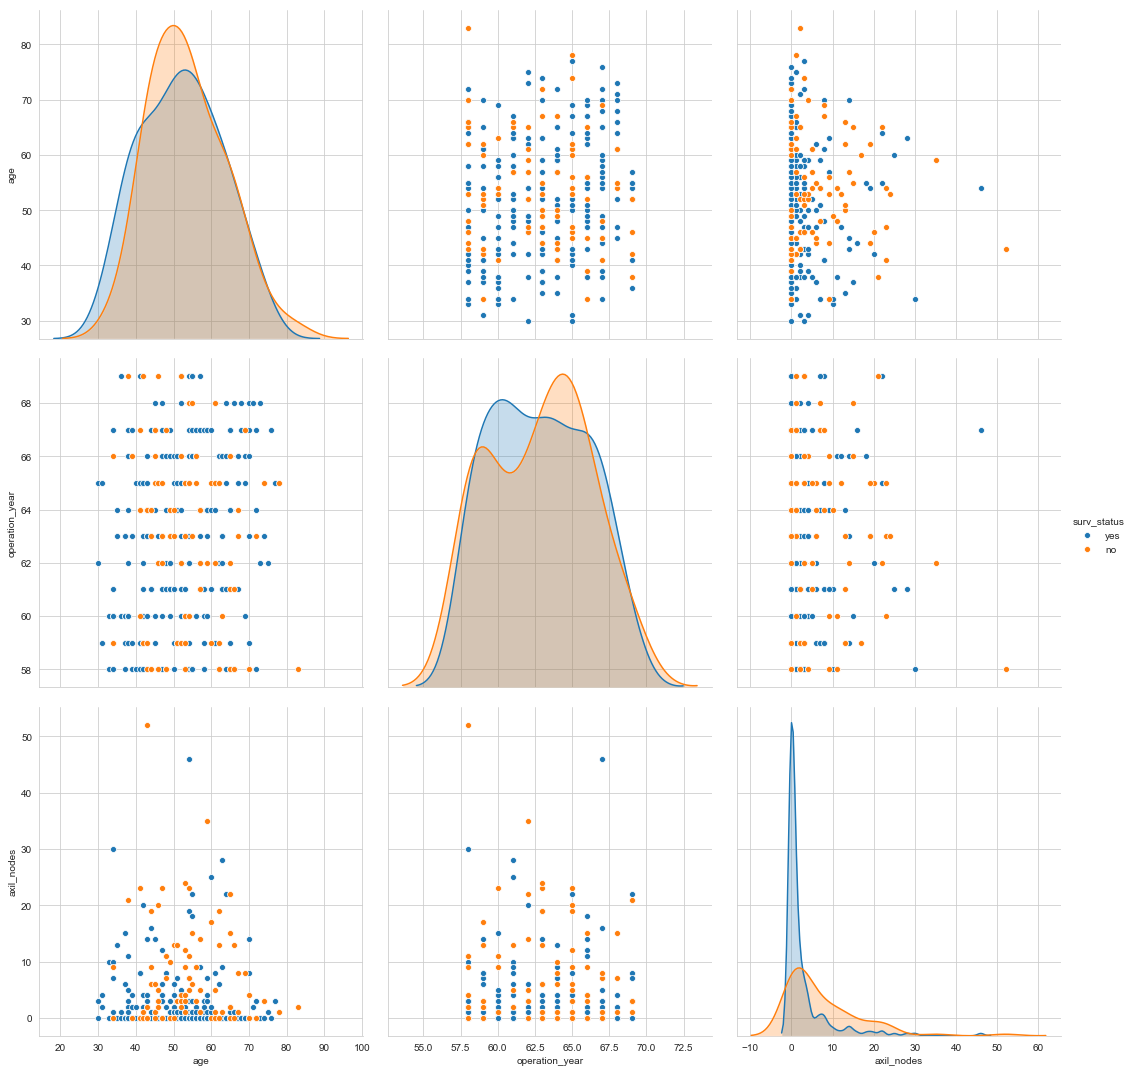

In [6]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='surv_status', size=5)
plt.show()

- Observations for the scatterplots above are mentioned below for the respective plot.

### 1.2 Scatter Plots

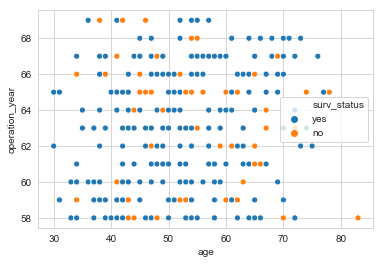

In [7]:
sns.scatterplot(data=df, x='age', y='operation_year', hue='surv_status')
plt.show()

**Observations**:

1. Survival rates are steadily increasing as the operation_year increases.

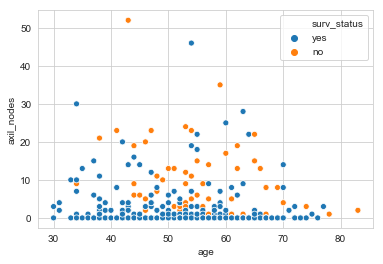

In [8]:
sns.scatterplot(data=df, x='age', y='axil_nodes', hue='surv_status')
plt.show()

**Observations**:

1. When considering axil_nodes and operation_year:
    - There are more people between ages 44-67(approx) who didn't survive
    -  There are more people who have survived who have 70 years of age and less than 15 axil_nodes

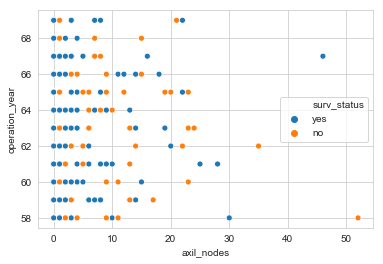

In [9]:
sns.scatterplot(data=df, x='axil_nodes', y='operation_year', hue='surv_status')
plt.show()

**Observations**:

1. People who have survived having lesser axil_nodes 0-4(approx) are more in number.

## 1.0 Univariate Analysis

In [10]:
df_surv = df[df['surv_status'] == 'yes']
df_unsurv = df[df['surv_status'] == 'no']

### 1.1 Histograms

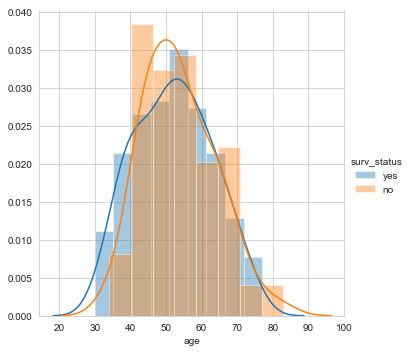

In [11]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'age', ) \
   .add_legend()
plt.show()

**Observations**:
    
1. People having age between 20-41(approx) has a higher chance of survival.
2. People having age between 42-58(approx) have lesser chances of survival.
3. Chances of surviving or not surviving are almost equally likely/random for both cases. 

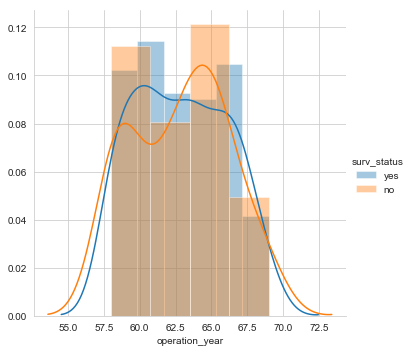

In [12]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'operation_year', ) \
   .add_legend()
plt.show()

**Observations**:
    
1. Chances of survival after the year 1960 increased considerably. (Maybe due to technological advancements)

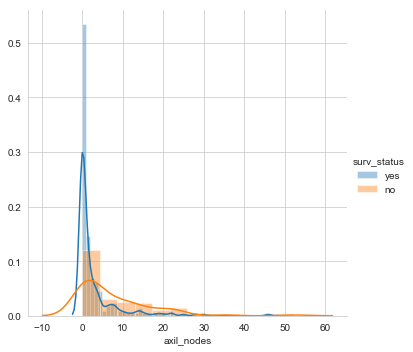

In [13]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'axil_nodes', ) \
   .add_legend()
plt.show()

**Observations**:
    
1. People having axil_nodes between 0-4(approx) tend to have a higher chance to survive.
2. People having axil_nodes > 4 are tend to have lesser chances to survive. 

### 1.2 Box Plots

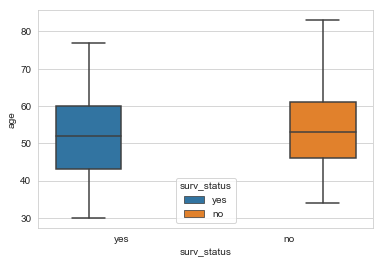

In [14]:
sns.boxplot(x='surv_status', y='age', data=df, hue='surv_status')
plt.show()

**Observations**:

1. 25th, 50th & 75th percentile ages for survival/unsurvival are very close.
2. People having age greater than 79 didn't survive as most of the spread of data (ages) for survival is between 30-78(approx)

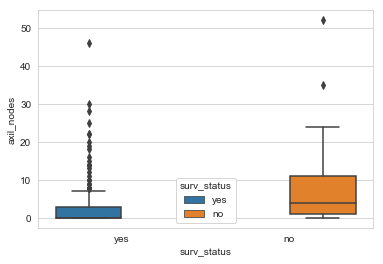

In [15]:
sns.boxplot(x='surv_status', y='axil_nodes', data=df, hue='surv_status')
plt.show()

**Observations**:

1. People having axil_nodes greater than 8(approx) didn't survive.

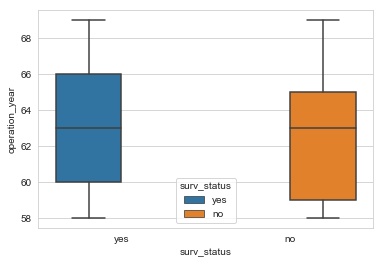

In [16]:
sns.boxplot(x='surv_status', y='operation_year', data=df, hue='surv_status')
plt.show()

### 2.4 PDF & CDF

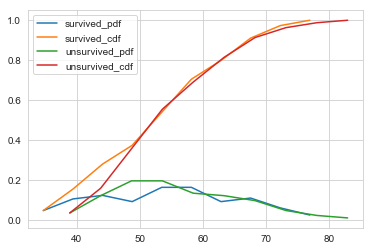

In [17]:
df_surv = df[df['surv_status'] == 'yes']
df_couldnt_surv = df[df['surv_status'] == 'no']

counts, bin_edges = np.histogram(df_surv['age'], bins=10, density=False)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_couldnt_surv['age'], bins=10, density=False)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['survived_pdf', 'survived_cdf', 'unsurvived_pdf', 'unsurvived_cdf'])

plt.show()

**Observations**

1. Between ages 44-56, there are lesser chances of surviving
2. There are 38%(approx) of people who survived having age <= 49(approx)
3. With increasing age, it becomes difficult to comment on survival/unsurvival

### Conclusion

* Using axil nodes and age tells us that there are more people between ages 44-67(approx) who didn't survive and there are more poeple who have survived having 70 years of age and less than 15 axil_nodes.

* In univariate analysis, when considering operation_year, chances of survival after the year 1960 increased considerably. (Maybe due to technological advancements).